# Week 1 - Tuesday lecture.

## Linear regression through least square minimisation

We'll sample points along a line and add noise. We'll then use Mean Square Error (MRSE) to find the coefficients of a line that fits at best the data.
You can change the standard deviation of the noise to 0 to check that you can recover exactly the original line. You can also increase it significantly and verify that the solution will diverge from the ground truth

In [20]:
import numpy as np
from numpy.linalg import inv, pinv

num_points = 20
dim = 2
x_range = [0,5]

#assuming y = w0 x + w1
def noisy_data(w, num_points, dim, noise_std=0.4):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y_true = w[0] * x + w[1]
    # Add Gaussian noise to the y values
    noise = np.random.normal(loc=0, scale=noise_std, size=num_points)
    y_noisy = y_true + noise
    return np.vstack([x,y_noisy]).T
    

true_w = np.random.uniform(low=x_range[0], high=x_range[1], size=(num_points))
points = noisy_data(true_w,num_points,dim)

points.shape

(20, 2)

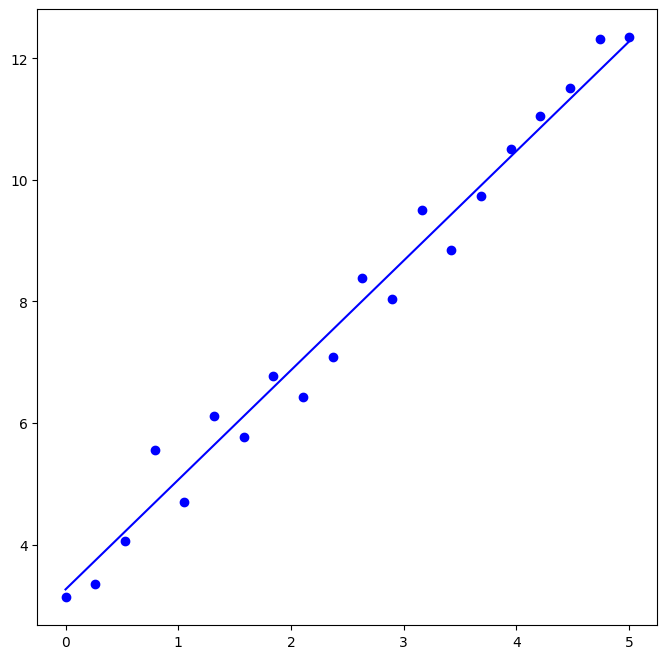

In [21]:
import matplotlib.pyplot as plt
#plotting

def plot_pts(plt, points, color="blue"):
    plt.scatter(points[:, 0], points[:,1], color=color, label='Points')

def plot_line(plt, w, color="blue"):
    x = np.linspace(x_range[0], x_range[1], 100)
    y_pred = w[0] * x +  w[1] 
    plt.plot(x, y_pred, label=f'y = {w[0]}x + {w[1]}', color=color)

plt.figure(figsize=(8, 8))
plot_pts(plt, points)
plot_line(plt,true_w)

Let's write the points into the matrix form that we want 

In [22]:
def toMatrix(points):
    npts = points.shape[0]
    dim  = points.shape[1]
    X = np.ones((dim, npts))
    X[0,:] = points[:,0]   
    y      = points[:,1].reshape((-1,1))
    return X.T,y

In [23]:
X, y = toMatrix(points)

In [38]:
w = inv(X.T.dot(X)).dot(X.T).dot(y)

We can also write this simply by directly calling the python "pinv" method:

In [39]:
invdiff = pinv(X) -  inv(X.T.dot(X)).dot(X.T)
print (max(invdiff.min(), invdiff.max(), key=abs))

-1.6653345369377348e-16


In [40]:
x = np.linspace(0, 5, 100)

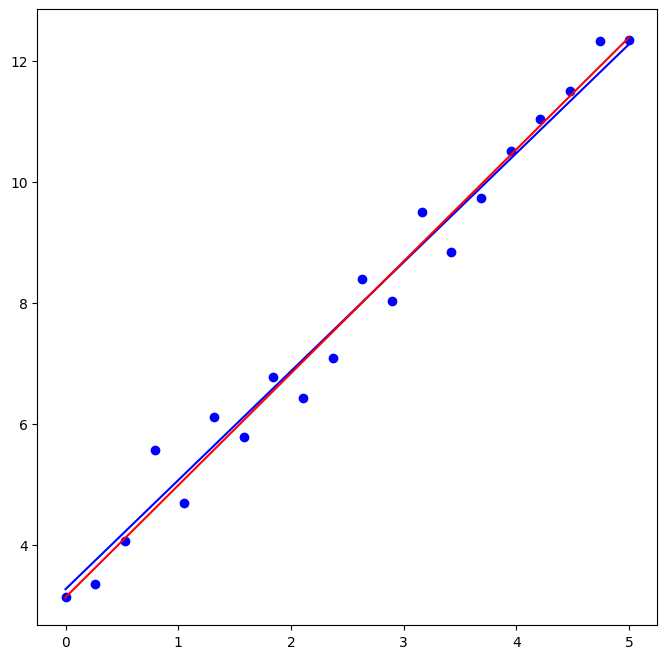

In [41]:
y_pred = w[0] * x +  w[1] 


plt.figure(figsize=(8, 8))
plot_pts(plt, points)
plot_line(plt,true_w)
plot_line(plt,w,"red")


### Exercise:
Proceed similarly to generate noisy data for a higher degree polynomial (with cubic and quadratic terms for instance) and verify that this works similarly


<span style="color:red">We probably did not have time to cover what follows here in class, please ignore for now </span>.


## Equality constrained least square minimisation using lagrange multipliers
Now suppose that we know the "ground truth" for the starting point in our samples. We want to force the solution line to go through this point by explicitely enforcing $y_0 = w_0 x_0 + w_1$. This equality constraint has the form $\mathbf{E} \mathbf{w} = \mathbf{e}$ and we will use the Lagrange multipliers to solve the problem.

First write the constraint into a matrix form:


In [42]:
def lagrangian(truth_point):
    e = np.array([truth_point[1]])
    E = np.array([truth_point[0],1]).reshape((1,-1))
    return E, e

point_truth = [0,true_w[1]]

E, e = lagrangian(point_truth)
truth_point = points[0]
np.array(truth_point[1])


array(3.13425853)

Using the derivation we have just seen, we end up with the following expression which we will need to invert:

$ 
\begin{bmatrix}
\mathbf{X}^T \mathbf{X} & \mathbf{E}^T \\
\mathbf{E} & 0
\end{bmatrix}
\begin{bmatrix}
\mathbf{w} \\
\lambda
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{X}^T \mathbf{y} \\
\mathbf{e}
\end{bmatrix}
$

In [43]:
xTx = X.T.dot(X)
xty = X.T.dot(y)

m = E.shape[0]  # Number of constraints (rows of E)

# Construct the zero matrix for the bottom-right block
zero_block = np.zeros((m, m))
top_block = np.hstack((xTx, E.T))
bottom_block = np.hstack((E, zero_block))
block_matrix = np.vstack((top_block, bottom_block))

rhs = np.vstack((xty, e))

weq = pinv(block_matrix).dot(rhs)[:2]


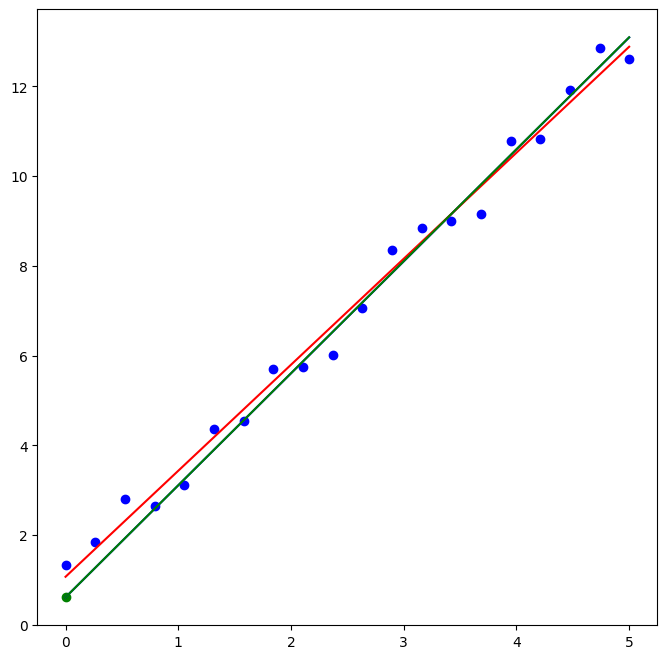

In [148]:
y_pred = w[0] * x +  w[1] 


plt.figure(figsize=(8, 8))
plot_pts(plt,points)
plot_pts(plt,np.array([point_truth]),"green")
plot_line(plt,true_w)
plot_line(plt,w,"red")
plot_line(plt,weq,"green")